# Step 1: Importing Libraries and Loading Data:

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [0]:
train_df = pd.read_csv('/content/drive/My Drive/Jigsaw/train.csv.zip')
test_df = pd.read_csv('/content/drive/My Drive/Jigsaw/test.csv.zip')

# Step 2: Exploratory Data Analysis 

## 2.1 - `target` feature

- It is the measure of toxicity for a comment text. 
- It ranges b/w `0.0` to `1.0`
- Value of `0.0` implies non-toxic and value of `1` implies highly toxic. 

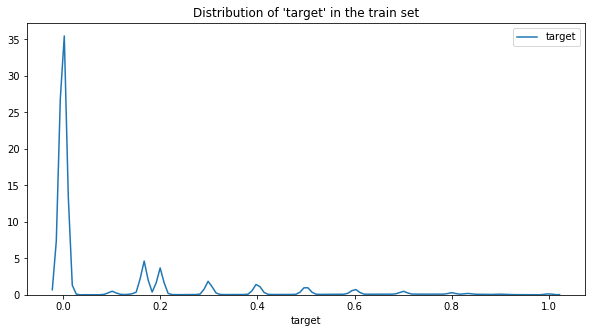

In [0]:
#Distribution plot
plt.figure(figsize=(10,5))
plt.title("Distribution of 'target' in the train set")
sns.distplot(train_df['target'], kde=True, hist=False, bins=120, label='target')
plt.legend()
plt.show()

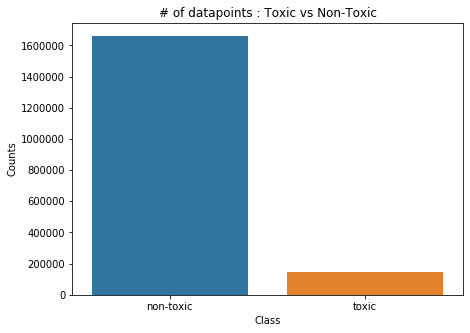

In [0]:
#assigning 'target'>=0.5 as toxic(1) and 'target<0.5' as non-toxic

data = np.where(train_df['target'] >= 0.5, 1, 0)
data = Counter(data)

fig, axe = plt.subplots(figsize=(7,5))
sns.barplot(['non-toxic','toxic'],[data[0], data[1]],orient="v", ax=axe)
plt.title("# of datapoints : Toxic vs Non-Toxic")
plt.ylabel("Counts")
plt.xlabel("Class")
plt.show()

__CONCLUSION:__
- The dataset is very much imbalanced.

## 2.2 - Auxiliary target features

The data also has several additional toxicity subtype attributes that are highly correlated to `target` feature. These features are:
- `severe_toxicity`
- `obscene`
- `threat`
- `insult`
- `identity_attack`
- `sexual_explicit`


In [0]:
#https://www.kaggle.com/gpreda/jigsaw-eda
def plot_features_distribution(features, title):
    """Plot the distribution plot on input list of feature values"""
    
    plt.figure(figsize=(10,5))
    plt.title(title)

    #looping through each feature on which we have to plot a distribution plot    
    for feature in features:
        sns.distplot(train_df.loc[~train_df[feature].isnull(),feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel("Toxicity Score")
    plt.legend()
    plt.show()

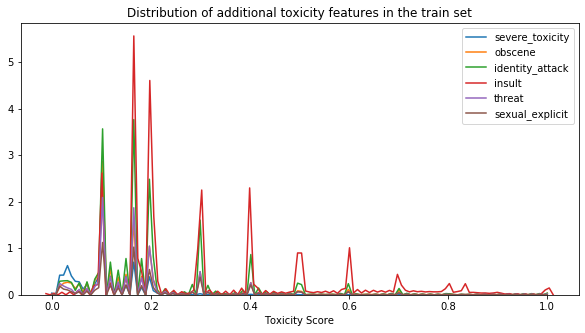

In [0]:
features = ['severe_toxicity', 'obscene','identity_attack','insult','threat', 'sexual_explicit']
plot_features_distribution(features, "Distribution of additional toxicity features in the train set")

In [0]:
#https://www.kaggle.com/gpreda/jigsaw-eda
def plot_stack_bar(features_to_plot, ylabel_, tlabel):
    """This function plot the stack bar for given list of atrributes/features"""
  
    #computing count for toxic and non-toxic for every features
    toxic = []
    non_toxic = []
    
    #loop through each input feature
    for feature in features_to_plot:
        #samples the points for given feature while discarding all the nan points
        subgroup = train_df[["target", feature]][~train_df[feature].isnull()]
        #counting values of each class and saving it to a feature
        subgroup_counts = subgroup["target"][subgroup[feature]!=0].value_counts()
        #append nos of non-toxic points
        non_toxic.append(subgroup_counts.iloc[0]) 
        #append nos of toxic points
        toxic.append(subgroup_counts.iloc[1])
   
    total_ft = len(features_to_plot)
    indx = np.arange(total_ft)
    width = 0.25
    
    #plotting
    plt.figure(figsize=(7,5))
    p1 = plt.bar(indx, non_toxic, width)
    #bottom=non_toxic this argument stack the plot on top of other
    p2 = plt.bar(indx, toxic, width, bottom=non_toxic)
    
    plt.ylabel(ylabel_)
    plt.title(tlabel)
    plt.xticks(indx, features_to_plot, rotation=30)
    plt.legend((p1[0], p2[0]), ('non-toxic', 'toxic'))
    plt.show()

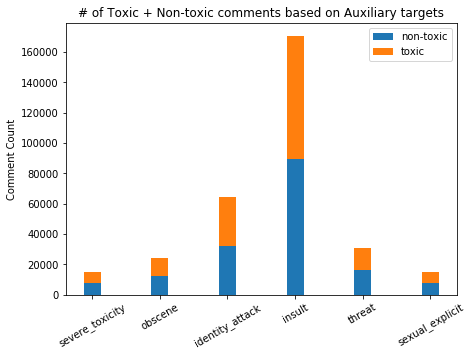

In [0]:
plot_stack_bar(features, "Comment Count", tlabel="# of Toxic + Non-toxic comments based on Auxiliary targets")

__CONCLUSION:__
- Most comments are made with the intention to `insult` someone.

## 2.3 - Identity Sub-groups

A subset of comments have also been labelled with a variety of identity attributes. They can be grouped into five categories: `race` or `ethnicity`, `gender`, `sexual orientation`, `religion` and `disability`, as following:

- `race or ethnicity`: asian, black, jewish, latino, other_race_or_ethnicity, white
- `gender`: female, male, transgender, other_gender
- `sexual orientation`: bisexual, heterosexual, homosexual_gay_or_lesbian, other_sexual_orientation
- `religion`: atheist,buddhist, christian, hindu, muslim, other_religion
- `disability`: intellectual_or_learning_disability, other_disability, physical_disability, psychiatric_or_mental_illness

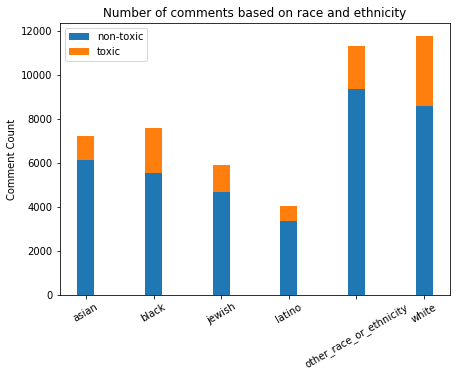

In [0]:
features = ['asian', 'black', 'jewish', 'latino', 'other_race_or_ethnicity', 'white']
plot_stack_bar(features, "Comment Count", "Number of comments based on race and ethnicity")

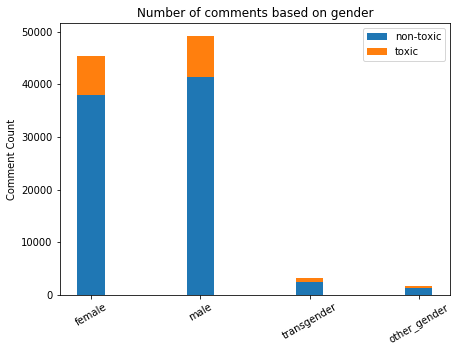

In [0]:
features = ['female', 'male', 'transgender', 'other_gender']
plot_stack_bar(features, "Comment Count", "Number of comments based on gender")

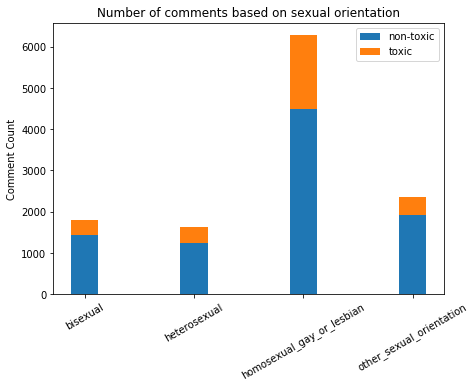

In [0]:
features = ['bisexual', 'heterosexual', 'homosexual_gay_or_lesbian', 'other_sexual_orientation']
plot_stack_bar(features, "Comment Count", "Number of comments based on sexual orientation")

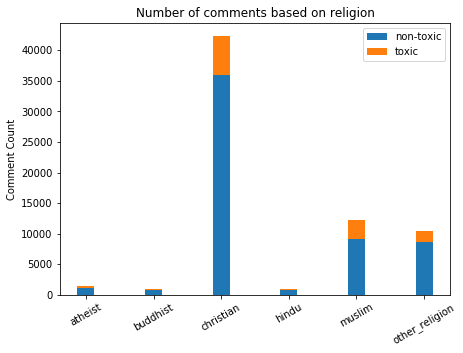

In [0]:
features = ['atheist','buddhist',  'christian', 'hindu', 'muslim', 'other_religion']
plot_stack_bar(features, "Comment Count", "Number of comments based on religion")

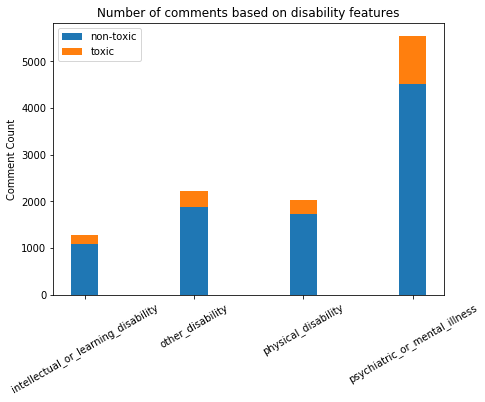

In [0]:
features = ['intellectual_or_learning_disability', 'other_disability', 'physical_disability', 'psychiatric_or_mental_illness']
plot_stack_bar(features, "Comment Count", "Number of comments based on disability features")

__CONCLUSION:__
- Most comments are made on 'Christian' religion. Also, most of the toxic comments are made on this religion.
- The comments that mentions 'gay' or 'lesbian' are also more likely to be toxic.

## 2.4 - `comment_text` feature

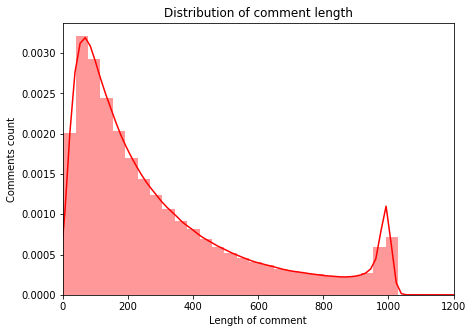

In [0]:
comment_len = train_df['comment_text'].apply(len)
plt.figure(figsize=(7,5))
sns.distplot(comment_len, color='red')
plt.title('Distribution of comment length')
plt.xlabel('Length of comment')
plt.ylabel('Comments count')
plt.xlim(0, 1200)
plt.show()

In [0]:
print("Averge comment length: ", sum(comment_len)/len(comment_len))

Averge comment length:  297.2343266067327


__CONCLUSION:__
- We have a bimodal distribution of character length in the data.
- Average length of comments is 297

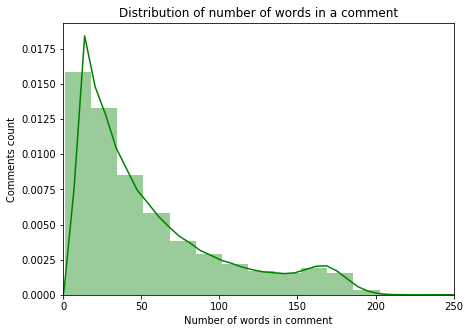

In [0]:
comment_len2 = [len(text.split(" ")) for text in train_df['comment_text'].values.tolist()]

plt.figure(figsize=(7,5))
plt.title('Distribution of number of words in a comment')
plt.xlabel('Number of words in comment')
plt.ylabel('Comments count')
plt.xlim(0, 250)
sns.distplot(comment_len2, color='g')
plt.show()

In [0]:
print("Averge number of words in a comment: ", sum(comment_len2)/len(comment_len2))

Averge number of words in a comment:  51.86124017521445


__CONCLUSION:__
- We have a clear unimodal left-skewed distribution of the number of words in the data.
- Average number of words in a comment is 52

In [0]:
# https://www.kaggle.com/gpreda/jigsaw-eda

stopwords = set(STOPWORDS)

def show_wordcloud(data, max_words, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=max_words,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(" ".join(data))

    fig = plt.figure(1, figsize=(8,8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

Next, we will sample 20,000 comments (both toxic and non-toxic) and see the Wordcloud for the top 100 words.

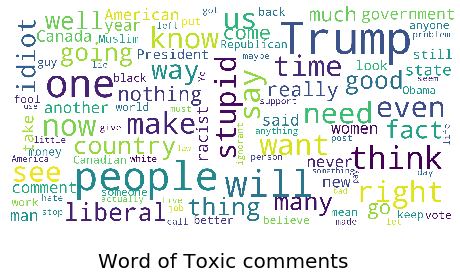

In [0]:
show_wordcloud(train_df.loc[train_df['target'] >= 0.50]['comment_text'].sample(20000),
               max_words = 100,
               title = 'Word of Toxic comments')

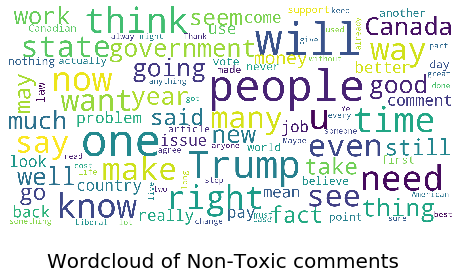

In [0]:
show_wordcloud(train_df.loc[train_df['target'] < 0.50]['comment_text'].sample(20000), 
               max_words = 100,
               title = 'Wordcloud of Non-Toxic comments')